# Решение задачи классификации

* загрузка данных и их анализ
* обучение и валидация модели
* интерпретация результатов модели
* сохранение экспериментов

Мы будем активно пользоваться следующими библиотеками Python:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Matplotlib - для визуализации данных
*   Sklearn - библиотеки с основными инструментами ML

С функционалом этих библиотек разберемся в процессе прохождения курса.

Посмотрим, как пользоваться логистической регрессией в python для решения задач классификации.

Будем решать задачу определения оттоковых клиентов,  а именно, *по характеристикам клиентов некоторого банка будем определять, собираются ли клиенты сменить банк или нет*.

**Наши цели на сегодня**

*  Обучить логистическую регрессию на представленном датасете.
*  Оценить качество полученной модели и сравнить с методом ближайших соседей.

## Загрузка данных и их первичный анализ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/churn_clients/main/ClientsData.csv")

data.shape

(15223, 10)

Посмотрим на данные.

Описание данных клиентов:
- AGE	— возраст клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- PERSONAL_INCOME — личный доход клиента (в рублях);
- Complaints — количество обращений в службу поддержки банка;
- Answers — количество вопросов, не решенных службой поддержки;

- TARGET — целевая переменная: собирается ли клиент сменить банк (1 — да, 0 — нет).




In [ ]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,TARGET,Complaints,Answers
0,49,1,0,1,2,1,5000.0,0,1,1
1,32,1,0,1,3,3,12000.0,0,1,1
2,52,1,0,1,4,0,9000.0,0,2,1
3,39,1,0,1,1,1,25000.0,0,1,1
4,30,1,0,0,0,0,12000.0,0,2,1


## Quiz

Посмотрите, есть ли в данных пропущенные значения.

In [3]:
# your code here

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   TARGET             15223 non-null  int64  
 8   Complaints         15223 non-null  int64  
 9   Answers            15223 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.2 MB


## Quiz

Постройте гистограмму распределения целевой переменной (TARGET) и ответьте по ней на вопрос теста

<Axes: >

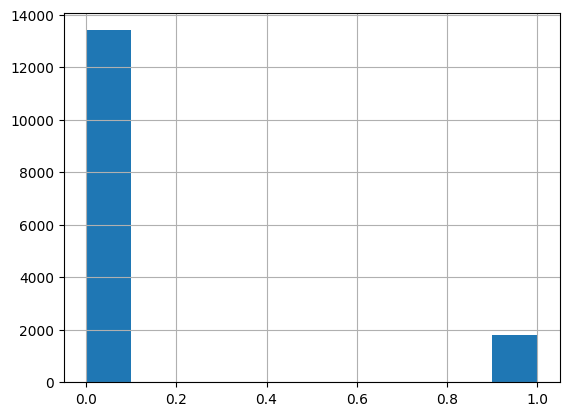

In [4]:
# your code here

data['TARGET'].hist()

## Обучение и валидация модели

Сформируем матрицу X объект-признак и вектор y целевой переменной.

In [5]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

Когда мы решаем задачу классификации, мы можем захотеть предсказывать не только классы, но и их вероятности. Для целей бизнеса, например, полезно знать, с какой вероятностью клиент вернет кредит (а не просто - вернет кредит или не вернет). Например, если клиент уйдет из банка с вероятностью 0.95, то это очень ненадежный клиент. А если с вероятностью 0.52  - этот клиент под вопросом. Но с точки зрения бинарной классификации для обоих клиентов модель предскажет, что они уйдут, так как стандартный порог перевода вероятности в классы - 0.5.

* задача классификации, в которой модель предсказывает только классы - это **жесткая классификация**
* если же классификатор предсказывает вероятности классов - это **мягкая классификация**

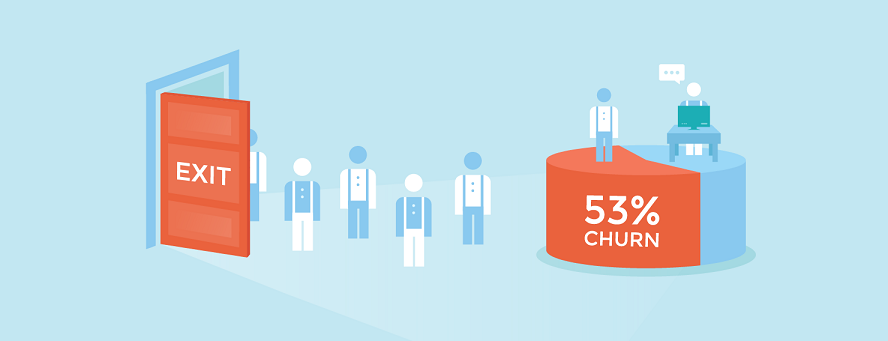

**Логистическая регрессия** - это линейный классификатор, который кроме классов корректно предсказывает вероятности классов.

Модель делает предсказания по формуле
$$a(x) = w_0 + w_1x_1 + w_2x_2 + ...,$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если
* $x_1$ - возраст клиента
* $x_2$ - число жалоб клиента на банк,
то обученная модель может иметь вид
$$a(x) = 10 - 3x_1 + 50x_2$$

Веса модели подбираются автоматически так, чтобы ошибка предсказания модели была минимальной.

Для начала разобъём данные на train и test (test — 25% от всех данных).

Давайте применим логистическую регрессию для поиска оттоковых клиентов!

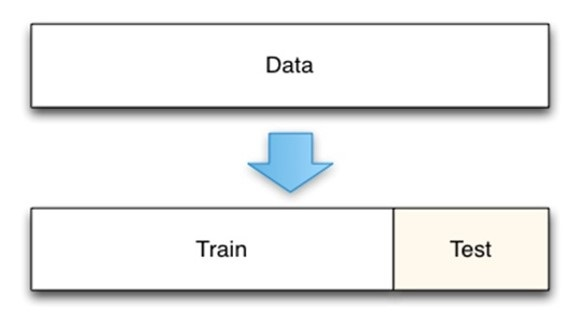

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрим на основные характеристики признаков.

In [7]:
X.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,Complaints,Answers
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,40.406096,0.909610,0.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889
std,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


## Quiz

В одинаковых ли масштабах измеряются признаки клиентов?

Какой признак имеет наибольший разброс значений?

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,Complaints,Answers
0,0.735974,0.317749,-0.395161,0.727742,-1.108903,-0.79471,-0.652688,4.527396,3.281398
1,0.050067,0.317749,-0.395161,0.727742,-1.108903,-0.79471,-0.990101,-0.490981,-0.762613
2,-0.550101,0.317749,-0.395161,0.727742,-1.108903,-0.79471,0.134611,0.763613,1.259392
3,-0.464363,0.317749,-0.395161,-1.374113,0.900995,1.66016,1.934152,-0.490981,-0.762613
4,0.135806,0.317749,-0.395161,-1.374113,0.900995,1.66016,0.809439,-0.490981,-0.762613


Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [9]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [10]:
pred_test = model.predict(Xtest) # предсказание классов

Посмотрим на предсказания модели и оценим ее качество.

In [11]:
pred_test[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## Quiz

Чему равна accuracy для логистической регрессии (на тестовых данных)?

Ответ округлите до сотых.

In [12]:
# your code here

accuracy_score(ytest, pred_test)

0.8791382028376248

## Вопрос

Доля верно определенных классов высокая! Значит ли это, что качество хорошее?


Проверим, сбалансирована ли выборка.

In [13]:
y.value_counts(normalize=True)

0    0.88097
1    0.11903
Name: TARGET, dtype: float64

Баланса классов нет: большинство клиентов не собирается менять банк ($y=0$).

Посмотрим, что предсказывает модель.

In [14]:
pred_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Для оценки качества моделей бинарной классификации полезно смотреть на матрицу ошибок (confusion matrix):

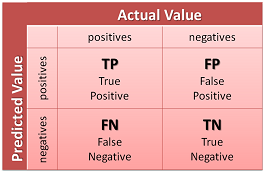

Эта матрица состоит из четырех чисел:

* **True Positive (TP)** - количество объектов положительного класса, предсказанных моделью как положительные (верные предсказания)
* **False Positive (FP)** - количество объектов отрицательного класса, предсказанных моделью как положительные (ошибки модели)
* **False Negative (FN)** - количество объектов положительного класса, предсказанных моделью как отрицательные (ошибки модели)
* **True Negative (TN)** - количество объектов отрицательного класса, предсказанных моделью как отрицательные (верные предсказания).

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, pred_test)

array([[3346,    2],
       [ 458,    0]])

Модель верно не определила ни одного оттокового клиента :(

Также можно посмотреть на метрику **recall (полнота)** - она показывает, какую долю оттоковых клиентов (объектов положительного класса) нашла модель.

In [16]:
from sklearn.metrics import recall_score

recall_score(ytest, pred_test)

0.0

Давайте разберемся, почему так произошло?

Посмотрим на вероятности, выдаваемые моделью.

In [17]:
probs = model.predict_proba(Xtest)

probs[:10]

array([[0.74792386, 0.25207614],
       [0.91263782, 0.08736218],
       [0.85376016, 0.14623984],
       [0.84332411, 0.15667589],
       [0.84902   , 0.15098   ],
       [0.90377594, 0.09622406],
       [0.87595062, 0.12404938],
       [0.86171898, 0.13828102],
       [0.83460356, 0.16539644],
       [0.89310686, 0.10689314]])

Модель слишком позитивна. Она присваивает классу 0 (клиент не уйдет) всегда большие вероятности.

Попробуем изменить **порог для перевода вероятности в классы** со стандартного 0.5 на порог поменьше.

In [18]:
probs_churn = probs[:,1]

classes = probs_churn > 0.12

In [ ]:
confusion_matrix(ytest, classes)

array([[1893, 1455],
       [ 163,  295]])

In [19]:
from sklearn.metrics import precision_score

recall_score(ytest, classes), precision_score(ytest, classes)

(0.6441048034934498, 0.16857142857142857)

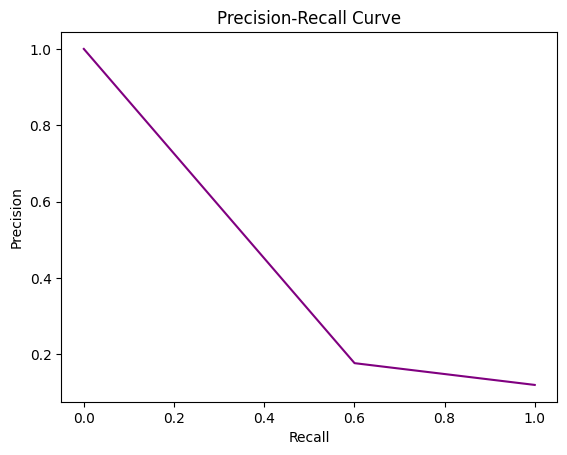

In [29]:
from sklearn. metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(ytest, classes)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Теперь модель стала находить оттоковых клиентов, но и больше ошибается на тех клиентах, которые не уйдут.

## Задание

Подберите порог, чтобы recall был больше 0.6, а precision максимальна

In [28]:
classes = probs_churn > 0.126
recall_score(ytest, classes), precision_score(ytest, classes)

(0.6004366812227074, 0.1773049645390071)

## Вопрос для Quiz

Вычислите accuracy на новых классах (сравните ytest с classes)

In [ ]:
# ваш код здесь

## Интерпретация модели

После обучения модели можно посмотреть на её веса, то есть на коэффициенты при признаках, найденные моделью.

In [ ]:
model.coef_, model.intercept_

(array([[-0.27357381,  0.15056766, -0.05266394,  0.01489557,  0.082133  ,
          0.00291138,  0.23150349,  0.27551808, -0.44179942]]),
 array([-2.10802664]))

In [ ]:
import pandas as pd

coef_table = pd.DataFrame({'features' : list(X.columns), 'weights' : list(model.coef_[0])})

coef_table.sort_values(by='weights')

,features,weights
8,Answers,-0.441799
0,AGE,-0.273574
2,SOCSTATUS_PENS_FL,-0.052664
5,DEPENDANTS,0.002911
3,GENDER,0.014896
4,CHILD_TOTAL,0.082133
1,SOCSTATUS_WORK_FL,0.150568
6,PERSONAL_INCOME,0.231503
7,Complaints,0.275518


In [ ]:
np.corrcoef(X.Answers, X.Complaints)[0][1]

0.8593779364603136

## Quiz

Какой признак имеет наибольший по модулю вес?

Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Сохранение результатов экспериментов

Что сохраняем?

* Предсказания модели
* Саму модель

Сначала сохраним предсказания модели в файл:

In [ ]:
Xtest['predictions'] = probs_churn

Xtest[['predictions']].to_csv("PredictionsChurn.csv", index=False)

Теперь сохраним саму модель:

In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# а так модель можно загрузить из файла:
# with open('filename.pickle', 'rb') as f:
#     model = pickle.load(f)

## Бонус: pipeline

In [ ]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
    ])

pipe.fit(Xtrain, ytrain)

pred_pipe = pipe.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, pred_pipe)

array([[3348,    0],
       [ 457,    1]])